In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import soundfile as sf
import IPython
import cmath
from scipy.signal import spectrogram, lfilter

In [3]:
# Úloha 1

In [4]:
# Čtení soubory wav

In [5]:
mont_s, mont_fs = sf.read('audio/maskon_tone.wav')
mont_t = np.arange(mont_s.size) / mont_fs
mofft_s, mofft_fs = sf.read('audio/maskoff_tone.wav')
mofft_t = np.arange(mofft_s.size) / mofft_fs

In [6]:
# Grafy signálů

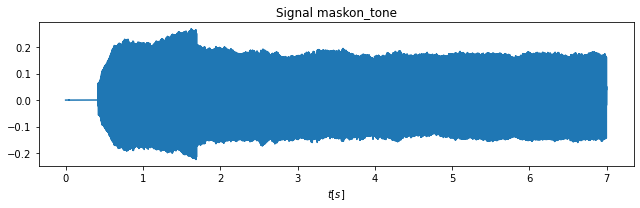

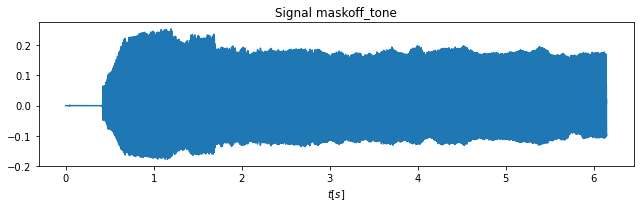

In [7]:
plt.figure(figsize=(9,3))
plt.plot(mont_t, mont_s)

plt.gca().set_xlabel('$t[s]$')
plt.gca().set_title('Signal maskon_tone')

plt.tight_layout()

plt.figure(figsize=(9,3))
plt.plot(mofft_t, mofft_s)

plt.gca().set_xlabel('$t[s]$')
plt.gca().set_title('Signal maskoff_tone')

plt.tight_layout()

In [8]:
# Úloha 2

In [9]:
# Čtení soubory wav

In [10]:
sentence_on_fs, sentence_on_s = wavfile.read('audio/maskon_sentence.wav')
sentence_on_s = sentence_on_s / 2**15
sentence_on = np.copy(sentence_on_s)
sentence_on -= np.mean(sentence_on)
sentence_on /= np.abs(sentence_on).max()
print(len(sentence_on_s))

78165


In [11]:
# Graf věty s rouškou

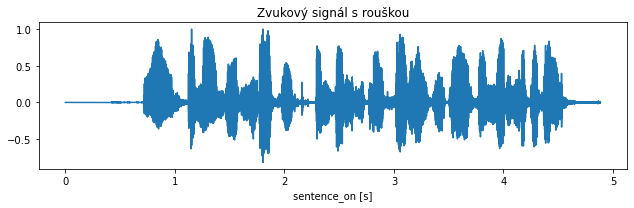

In [12]:
plt.figure(figsize=(9,3))
plt.plot(np.arange(sentence_on.size)/sentence_on_fs, sentence_on)
plt.gca().set_xlabel('sentence_on [s]')
plt.gca().set_title('Zvukový signál s rouškou')
plt.tight_layout()

In [13]:
# Čtení soubory wav

In [14]:
sentence_off_fs, sentence_off_s = wavfile.read('audio/maskoff_sentence.wav')
sentence_off_s = sentence_off_s / 2**15
sentence_off = np.copy(sentence_off_s)
sentence_off -= np.mean(sentence_off)
sentence_off /= np.abs(sentence_off).max()
print(len(sentence_off_s))

77483


In [15]:
# Graf věty bez roušky

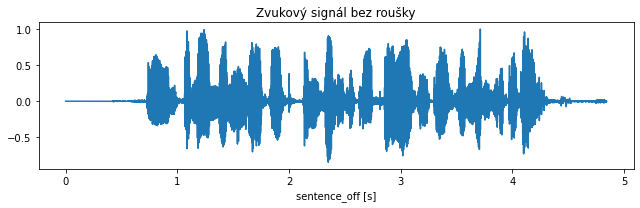

In [16]:
plt.figure(figsize=(9,3))
plt.plot(np.arange(sentence_off.size)/sentence_off_fs, sentence_off)
plt.gca().set_xlabel('sentence_off [s]')
plt.gca().set_title('Zvukový signál bez roušky')
plt.tight_layout()

In [17]:
# Úloha 3

In [18]:
# 1 sec signál

In [19]:
print(len(mont_s))
mont_seg = mont_s[int(5.9 * mont_fs) : int((5.9 + 1) * mont_fs)]
mont_seg_t = np.arange(mont_seg.size) / mont_fs
print(len(mont_seg))

print(len(mofft_s))
mofft_seg = mofft_s[int(4.5 * mofft_fs) : int((4.5 + 1) * mofft_fs)]
mofft_seg_t = np.arange(mofft_seg.size) / mofft_fs
print(len(mofft_seg))

111957
16000
98304
16000


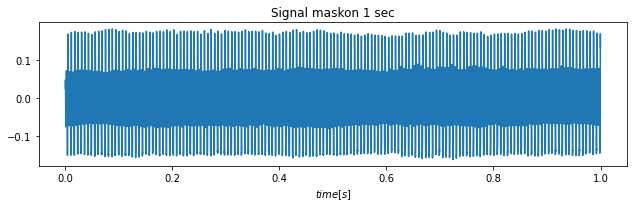

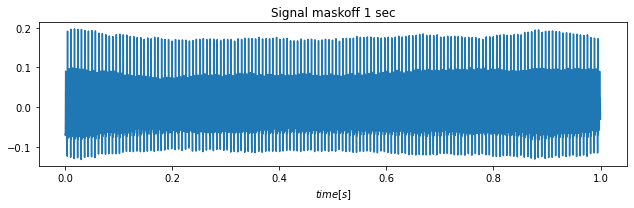

In [20]:
plt.figure(figsize=(9,3))
plt.plot(mont_seg_t, mont_seg)

plt.gca().set_xlabel('$time[s]$')
plt.gca().set_title('Signal maskon 1 sec')

plt.tight_layout()

plt.figure(figsize=(9,3))
plt.plot(mofft_seg_t, mofft_seg)

plt.gca().set_xlabel('$time[s]$')
plt.gca().set_title('Signal maskoff 1 sec')

plt.tight_layout()

In [21]:
#Normalizace

In [22]:
normal = np.mean(mont_seg)
mont_seg = [ segment - normal for segment in mont_seg ]
abs_normal = np.abs(mont_seg).max()
mont_seg = np.array([ segment / abs_normal for segment in mont_seg ])

normal = np.mean(mofft_seg)
mofft_seg = [ segment - normal for segment in mofft_seg ]
abs_normal = np.abs(mofft_seg).max()
mofft_seg = np.array([ segment / abs_normal for segment in mofft_seg ])

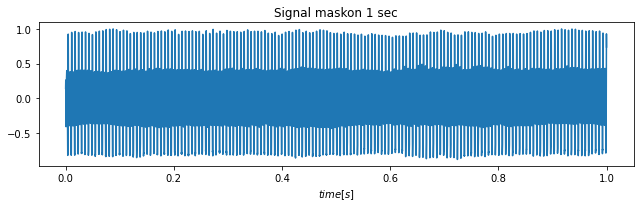

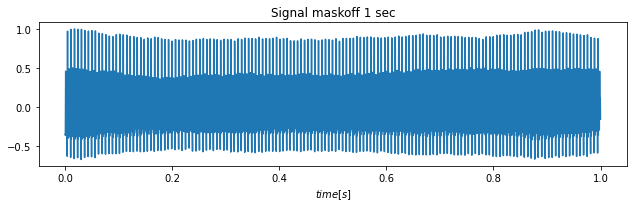

In [23]:
plt.figure(figsize=(9,3))
plt.plot(mont_seg_t, mont_seg)

plt.gca().set_xlabel('$time[s]$')
plt.gca().set_title('Signal maskon 1 sec')

plt.tight_layout()

plt.figure(figsize=(9,3))
plt.plot(mofft_seg_t, mofft_seg)

plt.gca().set_xlabel('$time[s]$')
plt.gca().set_title('Signal maskoff 1 sec')

plt.tight_layout()

In [24]:
# segment 0.02 sec

In [25]:
print(len(mont_seg))
mont_frame = mont_seg[: int((0.02) * mont_fs)]
mont_frame_t = np.arange(mont_frame.size) / mont_fs
print(len(mont_frame))

print(len(mofft_seg))
mofft_frame = mofft_seg[: int((0.02) * mofft_fs)]
mofft_frame_t = np.arange(mofft_frame.size) / mofft_fs
print(len(mofft_frame))

16000
320
16000
320


In [26]:
# list ramců

In [27]:
mont_frames = []
for i in range(99):
        mont_frames.append(np.array(mont_seg[int((0.01 * i) * mont_fs) : int((0.01 * (i + 2)) * mont_fs)]))

mofft_frames = []
for i in range(99):
        mofft_frames.append(np.array(mofft_seg[int((0.01 * i) * mofft_fs) : int((0.01 * (i + 2)) * mofft_fs)]))

In [28]:
# Graf 20 ms (1 ramec)

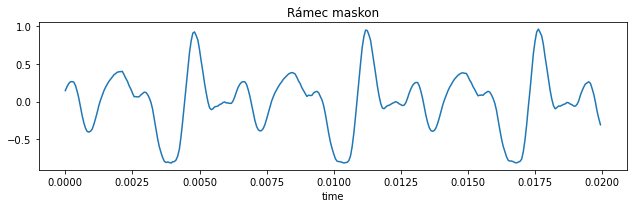

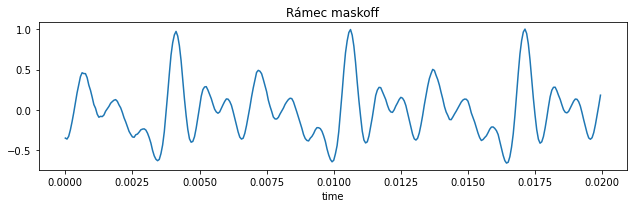

In [29]:
index_of_ramec = 0

plt.figure(figsize=(9,3))
plt.plot(mont_frame_t, mont_frames[index_of_ramec])

plt.gca().set_xlabel('time')
plt.gca().set_title('Rámec maskon')

plt.tight_layout()

plt.figure(figsize=(9,3))
plt.plot(mofft_frame_t, mofft_frames[index_of_ramec])

plt.gca().set_xlabel('time')
plt.gca().set_title('Rámec maskoff')

plt.tight_layout()

In [30]:
# Úloha 4

In [31]:
# Klipování 60%

In [32]:
mont_frames2 = []
for i in range(99):
    mont_frames3 = []
    for j in range(320):
        mont_frames3.append(mont_frames[i][j])
    mont_frames2.append(mont_frames3)
    
for frame in range(99):
    signal_max_on = np.abs(np.max(mont_frames[index_of_ramec]))
    for signal in range(len(mont_frames[index_of_ramec])):
            if mont_frames[index_of_ramec][signal] > signal_max_on * 0.6 :
                 mont_frames[index_of_ramec][signal] = 1
            elif mont_frames[index_of_ramec][signal] < signal_max_on * (-0.6) :
                 mont_frames[index_of_ramec][signal] = -1
            else:
                 mont_frames[index_of_ramec][signal] = 0
                    
mofft_frames2 = []
for i in range(99):
    mofft_frames3 = []
    for j in range(320):
        mofft_frames3.append(mofft_frames[i][j])
    mofft_frames2.append(mofft_frames3)
                
for frame in range(99):
    signal_max_off = np.abs(np.max(mofft_frames[index_of_ramec]))
    for signal in range(len(mofft_frames[index_of_ramec])):
            if mofft_frames[index_of_ramec][signal] > signal_max_off * 0.6 :
                 mofft_frames[index_of_ramec][signal] = 1
            elif mofft_frames[index_of_ramec][signal] < signal_max_off * (-0.6) :
                 mofft_frames[index_of_ramec][signal] = -1
            else:
                 mofft_frames[index_of_ramec][signal] = 0

In [33]:
# Vypis ramců a grafů klipování

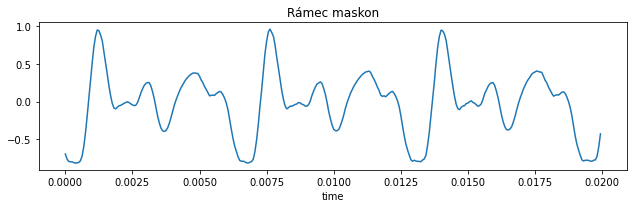

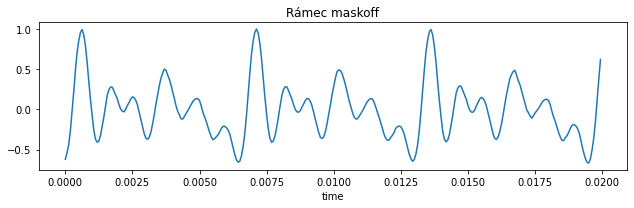

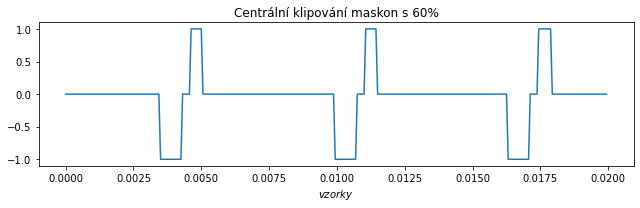

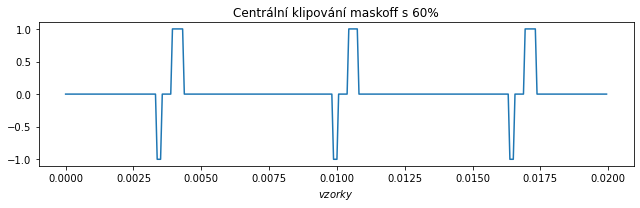

In [34]:
index_of_ramec = 0

plt.figure(figsize=(9,3))
plt.plot(mont_frame_t, mont_frames[1])

plt.gca().set_xlabel('time')
plt.gca().set_title('Rámec maskon')

plt.tight_layout()

plt.figure(figsize=(9,3))
plt.plot(mofft_frame_t, mofft_frames[1])

plt.gca().set_xlabel('time')
plt.gca().set_title('Rámec maskoff')

plt.tight_layout()

plt.figure(figsize=(9,3))
plt.plot(mont_frame_t, mont_frames[0])
plt.gca().set_xlabel('$vzorky$')
plt.gca().set_title('Сentrální klipování maskon s 60%')
plt.tight_layout()

plt.figure(figsize=(9,3))
plt.plot(mofft_frame_t, mofft_frames[0])
plt.gca().set_xlabel('$vzorky$')
plt.gca().set_title('Сentrální klipování maskoff s 60%')
plt.tight_layout()

In [35]:
# Autokorelace mask_on

In [36]:
mont_korel = []
for autokorelation in range(99):
    mont_autokor = []
    for lag in range(320):
        a = 0
        for summ in range(320-1-lag):
            a += mont_frames[autokorelation][summ] * mont_frames[autokorelation][summ+lag]
        mont_autokor.append(a)
    mont_korel.append(np.array(mont_autokor))
    
array_lag_on = []
for frame in mont_korel:
    #print(frame)
    array_lag_on.append(16000/frame[10:].argmax())

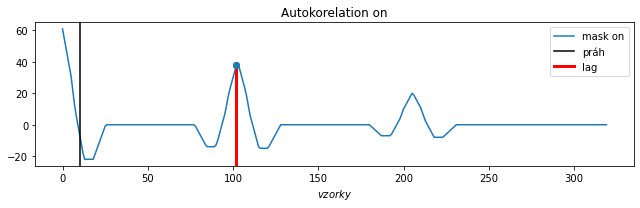

In [37]:
frame_number = 0

plt.figure(figsize=(9,3))
plt.plot(np.arange(320), mont_korel[frame_number], label = 'mask on')
#plt.plot(mont_korel[6], label= 'mask on')

plt.gca().set_xlabel('$vzorky$')
plt.gca().set_title('Autokorelation on')

plt.axvline(x=10, color='black', label='práh')
plt.axvline(x=np.argmax(mont_korel[1][10:])+10, linewidth=3, ymax = 0.7, color='red', label='lag')
plt.axvline(x=np.argmax(mont_korel[1][10:])+10, ymin = 0.7, ymax = 0.7, marker = 'o')
plt.legend()

plt.tight_layout()

In [38]:
# Autokorelace mask_off

In [39]:
mofft_korel = []
for autokorelation in range(99):
    mofft_autokor = []
    for lag in range(320):
        a = 0
        for summ in range(320-1-lag):
            a += mofft_frames[autokorelation][summ] * mofft_frames[autokorelation][summ+lag]
        mofft_autokor.append(a)
    mofft_korel.append(np.array(mofft_autokor))
    
array_lag_off = []
for frame in mofft_korel:
    #print(frame)
    array_lag_off.append(16000/frame[10:].argmax())

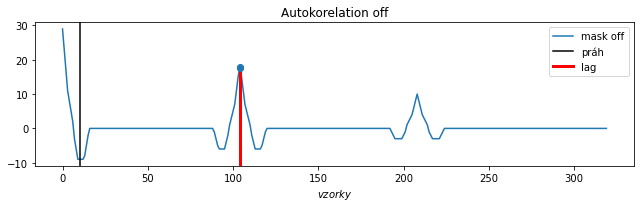

In [40]:
frame_number = 0

plt.figure(figsize=(9,3))
plt.plot(np.arange(320), mofft_korel[frame_number], label = 'mask off')

plt.gca().set_xlabel('$vzorky$')
plt.gca().set_title('Autokorelation off')

plt.axvline(x=10, color='black', label='práh')
plt.axvline(x=np.argmax(mofft_korel[1][10:])+10, ymax = 0.68, linewidth=3, color='red', label='lag')
plt.axvline(x=np.argmax(mofft_korel[1][10:])+10, ymin = 0.68, ymax = 0.69, marker = 'o')
plt.legend()

plt.tight_layout()

In [41]:
# Základní frekvence rámců

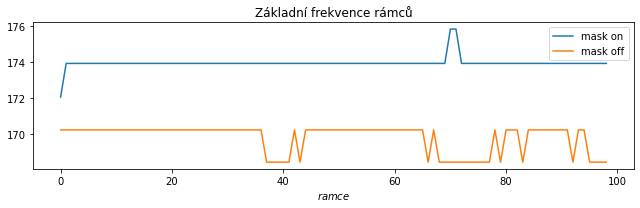

In [42]:
plt.figure(figsize=(9,3))
plt.plot(array_lag_on, label = 'mask on')
plt.plot(array_lag_off, label = 'mask off')

plt.gca().set_xlabel('$ramce$')
plt.gca().set_title('Základní frekvence rámců')

plt.legend()

plt.tight_layout()

In [43]:
print('Střední hodnota maskon = ', np.mean(array_lag_on), 'Rozptyl maskon = ', np.var(array_lag_on))

Střední hodnota maskon =  173.93276299307158 Rozptyl maskon =  0.10872100014894123


In [44]:
print('Střední hodnota maskoff = ', np.mean(array_lag_off), 'Rozptyl maskoff = ', np.var(array_lag_off))

Střední hodnota maskoff =  169.77841121178196 Rozptyl maskoff =  0.5895751408801504


In [45]:
# Úloha 5

In [46]:
mont_dft = []
for frame in mont_frames2:
    mont_dft.append(np.fft.fft(frame, n = 1024))
    
mofft_dft = []
for frame in mofft_frames2:
    mofft_dft.append(np.fft.fft(frame, n = 1024))

In [47]:
# Spektrogram

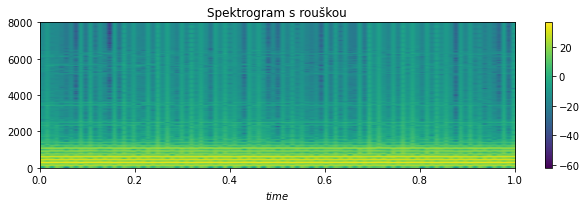

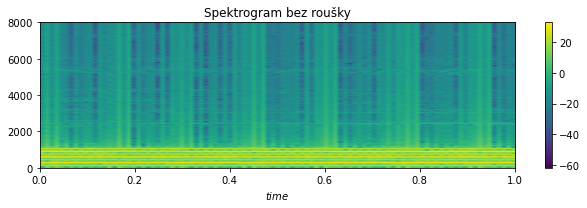

In [48]:
plt.figure(figsize=(9,3))
mont_dft1 = 10 * np.log10((np.abs(mont_dft))**2)
plt.gca().set_xlabel('$time$')
plt.gca().set_title('Spektrogram s rouškou')
plt.imshow(mont_dft1[:, 512:].T, aspect='auto', extent=[0, 1, 0, 8000])
plt.colorbar()
plt.tight_layout()

plt.figure(figsize=(9,3))
mofft_dft1 = 10 * np.log10((np.abs(mofft_dft))**2)
plt.gca().set_xlabel('$time$')
plt.gca().set_title('Spektrogram bez roušky')
plt.imshow(mofft_dft1[:, 512:].T, aspect='auto', extent=[0, 1, 0, 8000])
plt.colorbar()
plt.tight_layout()

In [49]:
# Moje DFT

In [50]:
def func_dft(mont_frames2):
    my_dft = []
    N = 1024
    for frame in mont_frames2:
        mont_frames_dft = []
        for k in range(1024):
            DFT = 0
            for n in range(320): #1024-1
                DFT += frame[n] * cmath.exp(-(cmath.pi*2j*k*n/N))
            mont_frames_dft.append(DFT)
        my_dft.append(np.array(mont_frames_dft))
    return my_dft

In [51]:
# Úloha 6

In [52]:
frek_filtr = []
for frame in range(99):
    filtr = mont_dft[frame][:512]/mofft_dft[frame][:512]
    frek_filtr.append(np.array(np.abs(filtr)))
frek_filtr = np.mean(np.abs(frek_filtr), axis=0)

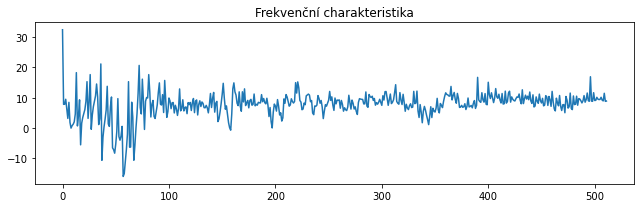

In [53]:
frek_filtr1 = 10 * np.log10((np.abs(frek_filtr))**2)
plt.figure(figsize=(9,3))
plt.plot(frek_filtr1)
plt.gca().set_title('Frekvenční charakteristika')
plt.tight_layout()

In [54]:
# Úloha 7

In [55]:
filtr_idft = np.fft.ifft(frek_filtr)

In [56]:
def func_idft(frek_filtr): 
    my_idft = []
    for n in range(512):
        IDFT = 0
        for k in range(512):
            IDFT += frek_filtr[k] * cmath.exp(2j*cmath.pi*k*n/512)/512
        my_idft.append(IDFT)
    my_idft.append(np.array(my_idft))
    return my_idft

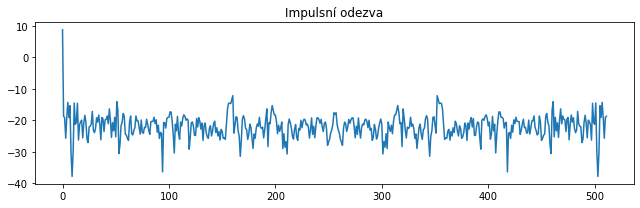

In [57]:
filtr_idft1 = 10 * np.log10((np.abs(filtr_idft))**2)
plt.figure(figsize=(9,3))
plt.plot(filtr_idft1)
plt.gca().set_title('Impulsní odezva')
plt.tight_layout()

In [58]:
# Úloha 8

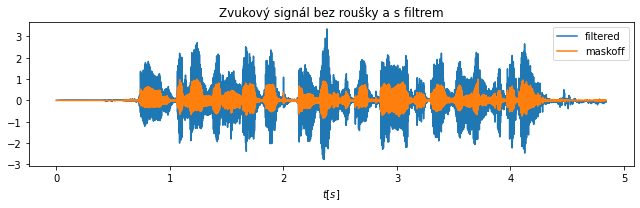

In [59]:
sentence_filtr = lfilter(np.abs(filtr_idft), 1, sentence_off)
plt.figure(figsize=(9,3))
plt.plot(np.arange(sentence_filtr.size)/sentence_off_fs, sentence_filtr, label='filtered')
plt.plot(np.arange(sentence_off.size)/sentence_off_fs, sentence_off, label='maskoff')
plt.legend()
plt.gca().set_xlabel('$t[s]$')
plt.gca().set_title('Zvukový signál bez roušky a s filtrem')
plt.tight_layout()

In [60]:
IPython.display.display(IPython.display.Audio(sentence_filtr, rate=16000))

In [61]:
IPython.display.display(IPython.display.Audio(sentence_on, rate=16000))

In [62]:
IPython.display.display(IPython.display.Audio(sentence_off, rate=16000))